From the IPython library the Image module has been imported to recognize the png format of the image and throw it out as an output using the **display** function.

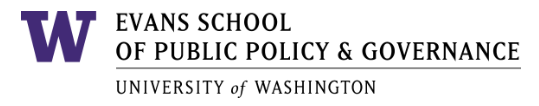

In [32]:
from IPython.display import Image
Image(filename='UWHeader.png')

**Student Name: TJ Vijapurapu**

**Subject: Computational Thinking for Governance Analytics**

**Faculty Name: Prof. José Manuel Magallanes, PhD**

**Date: 16 March, 2021**

**Summary of this file**: This file is a tutorial on cleaning and formatting the information on a table I will extract from a wikipedia page. The wikipedia page in this example is a list of countries by percentage of population living in poverty. The purpose of the code is to remove any impurities that does not allow one to format data and then to ensure that the cleaned value is formatted in the right data type. For example, any inconsistent blank spaces, uneeded symbols, etc will be cleaned out and then formatted to standardize content to ensure consistency. 

In the following code, "IFrame" helps host content from an external source on the webpage. This function has been "imported" from the IPython library. The display function shows the content for the user to view. 

In [33]:
from IPython.display import IFrame  
wikiLink="https://en.wikipedia.org/wiki/List_of_countries_by_percentage_of_population_living_in_poverty" 
IFrame(wikiLink, width=900, height=500)

In the following code, we import **pandas**, which is a package that Python needs to read **data frames** (data table). 
The object **wikiTables** is a list. 

In [34]:
import pandas as pd

wikiTables=pd.read_html(wikiLink, # link
                        #header=0, # where is the header?
                        flavor='bs4', # helper to translate html
                        attrs={'class': 'wikitable sortable'}) # attributes to identify element(s)

The index number below indicates the table number on the webpage. The table I wish to use here is the first one on the webpage and so I use the index number 0 to indicate it. Remember that numbers begin from 0 instead of 1 in Python.

In [35]:
wikiTables[0]

,Country,< $1.90[1],< $3.20[5],< $5.50[6],Year,Continent
0,Afghanistan,NaN,NaN,NaN,NaN,Asia
1,Albania,1.3%,8.2%,33.8%,2017.0,Europe
2,Algeria,0.4%,3.7%,28.6%,2011.0,Africa
3,Andorra,NaN,NaN,NaN,NaN,Europe
4,Angola,51.8%,73.2%,89.3%,2018.0,Africa
...,...,...,...,...,...,...
191,Venezuela,10.2%,17.8%,35.6%,2006.0,South America
192,Vietnam,1.9%,7.0%,23.6%,2018.0,Asia
193,Yemen,18.8%,52.2%,81.6%,2014.0,Asia
194,Zambia,57.5%,74.3%,87.2%,2015.0,Africa


TJdata is the object that has stored this dataframe temporarily.

In [36]:
TJdata=wikiTables[0]

In [37]:
TJdata

,Country,< $1.90[1],< $3.20[5],< $5.50[6],Year,Continent
0,Afghanistan,NaN,NaN,NaN,NaN,Asia
1,Albania,1.3%,8.2%,33.8%,2017.0,Europe
2,Algeria,0.4%,3.7%,28.6%,2011.0,Africa
3,Andorra,NaN,NaN,NaN,NaN,Europe
4,Angola,51.8%,73.2%,89.3%,2018.0,Africa
...,...,...,...,...,...,...
191,Venezuela,10.2%,17.8%,35.6%,2006.0,South America
192,Vietnam,1.9%,7.0%,23.6%,2018.0,Asia
193,Yemen,18.8%,52.2%,81.6%,2014.0,Asia
194,Zambia,57.5%,74.3%,87.2%,2015.0,Africa


In the following code, TJdata is being redefined as a modified table. The iloc function enables to select particular cells of the dataset. In this code, it is selecting all rows (as indicated by ":") and colums 1,4, and 6 as indicated by index numbers 0,3, and 5 respectively. 

In [38]:
TJdata=TJdata.iloc[:,[0,3,5]]

In [39]:
TJdata

,Country,< $5.50[6],Continent
0,Afghanistan,NaN,Asia
1,Albania,33.8%,Europe
2,Algeria,28.6%,Africa
3,Andorra,NaN,Europe
4,Angola,89.3%,Africa
...,...,...,...
191,Venezuela,35.6%,South America
192,Vietnam,23.6%,Asia
193,Yemen,81.6%,Asia
194,Zambia,87.2%,Africa


The second column name in the above dataset contains symbols that may get in the way of subsequent coding. To clean and format, brackets and "<" need to be removed. In the following code, the **change** is an object that replaces one column name to the other. In the following line, the TJdata dataframe uses a **rename** function to swap the names of the column and permanently store it as the true value.

In [40]:
change={'< $5.50[6]':'lessthan5_50'}

In [41]:
TJdata.rename(columns=change,inplace=True)

/Users/tejaswinivijapurapu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [42]:
TJdata

,Country,lessthan5_50,Continent
0,Afghanistan,NaN,Asia
1,Albania,33.8%,Europe
2,Algeria,28.6%,Africa
3,Andorra,NaN,Europe
4,Angola,89.3%,Africa
...,...,...,...
191,Venezuela,35.6%,South America
192,Vietnam,23.6%,Asia
193,Yemen,81.6%,Asia
194,Zambia,87.2%,Africa


An important part of formatting is to ensure that data has been recognized by python in the correct format. For example, numbers should be recognized as float while letters as object. the **info** function displays this information as shown below. 

In [43]:
TJdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       196 non-null    object
 1   lessthan5_50  164 non-null    object
 2   Continent     196 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


The info function shows that the lessthat5_50 column has not been recognized as numbers. As an alternative, the % in the above dataset has been taken out using the replace function as shown below. 

In [44]:
TJdata.lessthan5_50.str.replace('%','')

0       NaN
1      33.8
2      28.6
3       NaN
4      89.3
       ... 
191    35.6
192    23.6
193    81.6
194    87.2
195    74.0
Name: lessthan5_50, Length: 196, dtype: object

Even after taking out the "%" from the string, it is still being recognized as an object as shown below. 

In [45]:
TJdata['lessthan5_50']=TJdata.lessthan5_50.str.replace('%','')

<ipython-input-45-4ec947431cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TJdata['lessthan5_50']=TJdata.lessthan5_50.str.replace('%','')


In [46]:
TJdata

,Country,lessthan5_50,Continent
0,Afghanistan,NaN,Asia
1,Albania,33.8,Europe
2,Algeria,28.6,Africa
3,Andorra,NaN,Europe
4,Angola,89.3,Africa
...,...,...,...
191,Venezuela,35.6,South America
192,Vietnam,23.6,Asia
193,Yemen,81.6,Asia
194,Zambia,87.2,Africa


In [47]:
TJdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       196 non-null    object
 1   lessthan5_50  164 non-null    object
 2   Continent     196 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


As an alternative, the datatype of the data under column lessthan5_50 has been forced to be recognized as float using the **astype** function. The code following will save the column lessthan5_50 under TJdata as float values.

In [48]:
TJdata.lessthan5_50.astype('float')

0       NaN
1      33.8
2      28.6
3       NaN
4      89.3
       ... 
191    35.6
192    23.6
193    81.6
194    87.2
195    74.0
Name: lessthan5_50, Length: 196, dtype: float64

In [49]:
TJdata['lessthan5_50']=TJdata.lessthan5_50.astype('float')

<ipython-input-49-67f70220e6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TJdata['lessthan5_50']=TJdata.lessthan5_50.astype('float')


Let's check if the **info** function shows a float value for column lessthan5_50. 

In [50]:
TJdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       196 non-null    object 
 1   lessthan5_50  164 non-null    float64
 2   Continent     196 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


As can be seen above, float64 shows that Python now recognizes all values under column lessthan5_50 as float values.

The data now has been cleaned and formatted as shown below. It can now be used for susequent coding.

In [51]:
TJdata

,Country,lessthan5_50,Continent
0,Afghanistan,NaN,Asia
1,Albania,33.8,Europe
2,Algeria,28.6,Africa
3,Andorra,NaN,Europe
4,Angola,89.3,Africa
...,...,...,...
191,Venezuela,35.6,South America
192,Vietnam,23.6,Asia
193,Yemen,81.6,Asia
194,Zambia,87.2,Africa


Using the **to_csv** function, the file has been converted to a csv format. 

In [52]:
TJdata.to_csv('TJdata.csv',index=False)

In [53]:
TJdata

,Country,lessthan5_50,Continent
0,Afghanistan,NaN,Asia
1,Albania,33.8,Europe
2,Algeria,28.6,Africa
3,Andorra,NaN,Europe
4,Angola,89.3,Africa
...,...,...,...
191,Venezuela,35.6,South America
192,Vietnam,23.6,Asia
193,Yemen,81.6,Asia
194,Zambia,87.2,Africa
